In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sal = pd.read_csv("Adult Salary.csv")

In [4]:
sal

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
sal.columns

Index(['Age', 'Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [6]:
sal.shape

(32561, 13)

In [7]:
sal.size

423293

In [17]:
#1. Carry out missing value analysis on “Workclass” variable and treat them 
#(if any) using appropriate methods. 
sal['Workclass'].isna().sum()

##As sal['Workclass'] is a categorical variable --> we should use value_counts to look at the null values if any.

0

In [23]:
sal['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [24]:
sal['Workclass'].replace('?',np.nan,inplace=True)


In [25]:
sal['Workclass'].isnull().sum()

0

In [26]:
sal['Workclass'] = sal['Workclass'].fillna(sal['Workclass'].mode()[0])

In [27]:
sal['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='hours-per-week', ylabel='Income'>

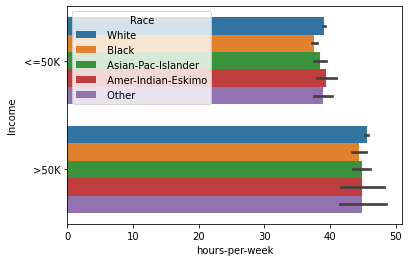

In [39]:
#2. Visualize the income-wise average working hours on the grounds of 
#race.
#sal.columns
sns.barplot(data = sal, hue = 'Race', x='hours-per-week', y ='Income'  )

<AxesSubplot:xlabel='hours-per-week', ylabel='Race'>

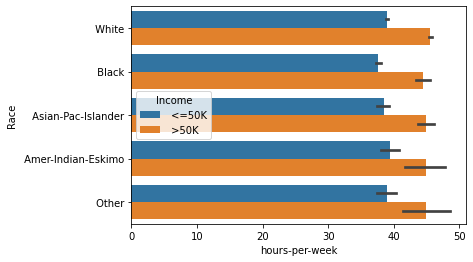

In [40]:
sns.barplot(data = sal, hue = 'Income', x='hours-per-week', y ='Race'  )

In [31]:
sal.columns

Index(['Age', 'Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [44]:
#3. Display the income and education wise count of the individuals.
sal.groupby('Education')['Income'].value_counts()

Education      Income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      >50K      306
                <=50K     107
 HS-grad        <=50K    8826
                >50K     1675
 Masters        >50K      959
                <=50K     764
 Preschool      <=50K      51
 Prof-school    >50K      423
                <=50K     153
 Some-college   <=50K    5904
                >50K     1387
Name: Income, dtype: int64

In [47]:
inc_ed = pd.crosstab(sal['Education'],sal['Income'])
inc_ed

Income,<=50K,>50K
Education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


<AxesSubplot:xlabel='Income', ylabel='count'>

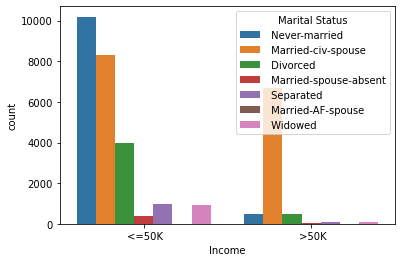

In [70]:
#4. How is marital status and income group correlated? Which relationship 
#status has highest number of >50k salaried individuals? 
#sal.columns
sns.countplot(x='Income', data = sal, hue = 'Marital Status')

In [ ]:
Married-civ-spouse has the highest income when comparing >50k salaried individual

In [ ]:


#5. Does race have any impact on the working hours put in by the people?
sal.columns

<AxesSubplot:xlabel='Race', ylabel='hours-per-week'>

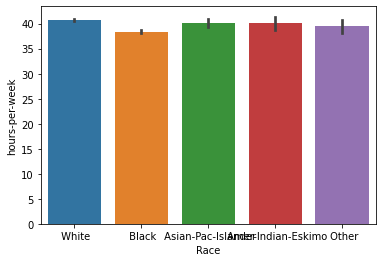

In [71]:
sns.barplot(data=sal, x="Race", y = "hours-per-week")

In [ ]:
No impact

### PRACTICE EXERCISE : 5

In [92]:
cc = pd.read_excel('CC_expenditure.xlsx')

In [93]:
cc

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88
...,...,...,...,...,...,...,...,...
1495,1496,A67,Normal Salary,Gold,2006-02-04,BUS TICKET,356872.73,55638.77
1496,1497,A68,Self Employed,Silver,2006-03-25,BUS TICKET,204971.10,319836.49
1497,1498,A69,Self Employed,Platinum,2006-03-31,BUS TICKET,50449.44,247628.45
1498,1499,A70,Self Employed,Platinum,2006-03-23,BUS TICKET,80593.94,454016.51


In [76]:
cc.columns

Index(['Sl No:', 'Customer', 'Segment', 'Product', 'Date', 'Type',
       'Amount spent', 'Amount repaid'],
      dtype='object')

In [90]:
#1. Extract the month and year from the Date column using appropriate 
##functions.
cc['year']=pd.DatetimeIndex(cc['Date']).year
cc['month'] = pd.DatetimeIndex(cc['Date']).month
cc

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid,Month,Year,year,month
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75,January,2004,2004,1
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02,January,2004,2004,1
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06,January,2004,2004,1
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12,January,2004,2004,1
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88,January,2005,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,Normal Salary,Gold,2006-02-04,BUS TICKET,356872.73,55638.77,February,2006,2006,2
1496,1497,A68,Self Employed,Silver,2006-03-25,BUS TICKET,204971.10,319836.49,March,2006,2006,3
1497,1498,A69,Self Employed,Platinum,2006-03-31,BUS TICKET,50449.44,247628.45,March,2006,2006,3
1498,1499,A70,Self Employed,Platinum,2006-03-23,BUS TICKET,80593.94,454016.51,March,2006,2006,3


In [95]:
cc["Month_name"] = cc["Date"].dt.month_name()
cc["Month"] = cc["Date"].dt.month
cc["Year"] = cc["Date"].dt.year
cc

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid,Month,Year,Month_name
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75,1,2004,January
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02,1,2004,January
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06,1,2004,January
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12,1,2004,January
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88,1,2005,January
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,Normal Salary,Gold,2006-02-04,BUS TICKET,356872.73,55638.77,2,2006,February
1496,1497,A68,Self Employed,Silver,2006-03-25,BUS TICKET,204971.10,319836.49,3,2006,March
1497,1498,A69,Self Employed,Platinum,2006-03-31,BUS TICKET,50449.44,247628.45,3,2006,March
1498,1499,A70,Self Employed,Platinum,2006-03-23,BUS TICKET,80593.94,454016.51,3,2006,March


In [101]:
#2. Conduct a segment-wise analysis of expenditure and repayment by the 
#customers across the years in question.
cc.columns
cc.groupby('Segment')[['Amount spent', 'Amount repaid','Year']].count()

,Amount spent,Amount repaid,Year
Segment,,,
Govt,274,274,274
Normal Salary,441,441,441
Salaried_MNC,244,244,244
Salaried_Pvt,269,269,269
Self Employed,272,272,272


In [ ]:
seg = pd.crosstab(values = ['Amount spent','Amount repaid'], index = ['Segment','year'],columns = ['Segment'], aggfunc = 'mean')

In [111]:
seg = pd.pivot_table(values = ['Amount spent','Amount repaid'], index = ['Segment','Year'], aggfunc = 'mean',data = cc)
seg

Amount repaid   Amount spent
Segment       Year                              
Govt          2004  228019.607568  221715.510000
              2005  240978.577283  220804.596087
              2006  248778.109722  247979.612778
Normal Salary 2004  234850.025433  246908.400236
              2005  233664.145106  264088.639078
              2006  261810.074046  225514.923006
Salaried_MNC  2004  264863.717067  260576.194000
              2005  272690.540500  207076.246625
              2006  242091.942584  248756.644719
Salaried_Pvt  2004  247623.863521  264846.524648
              2005  243770.227170  253271.016321
              2006  235021.285109  250110.646848
Self Employed 2004  271039.693611  255290.961528
              2005  248815.030973  243648.109115
              2006  252388.129195  238051.805747

In [127]:
##3. What’s your take on the movement of repayment behavior of the 
##customers over the years in consideration?
#cc.columns
rb = pd.pivot_table(values = ["Amount repaid"], index = ["Year","Month","Month_name"], aggfunc = 'mean',data = cc)
rb

Amount repaid
Year Month Month_name               
2004 1     January     248839.599511
     2     February    236745.639643
     3     March       243941.665714
     4     April       272055.627500
     5     May         226604.377143
     9     September   230077.797143
     11    November    229386.352143
2005 1     January     196615.430357
     2     February    263906.451250
     4     April       249377.405714
     5     May         240969.149286
     6     June        217940.918810
     7     July        264188.297857
     8     August      234056.370714
     9     September   174762.825714
     10    October     256791.863571
     11    November    245651.498571
     12    December    325930.967143
2006 1     January     242672.027143
     2     February    249520.686429
     3     March       255599.066267
     4     April       239652.372553
     5     May         253574.374286
     6     June        324870.033571
     7     July        204736.559643
     8     August      263206.928571
     9     September   264404.009286
     10    October     271987.877857
     11    November    245622.959643
     12    December    204621.001429

In [196]:
#4. What kind of purchase of a good or service has been spent by the customers 
#the most on in the year 2004?
##cc.columns
year2004 = cc[cc['Year']== 2004]
gs_spent = year2004.pivot_table(index = ['Type'],values = ['Amount spent'],columns = ['Year'],aggfunc = 'sum')
gs_spent

,Amount spent
Year,2004
Type,
AIR TICKET,8370914.59
AUTO,837121.32
BIKE,880622.23
BUS TICKET,9352736.78
CAMERA,15808342.75
CAR,3458008.80
CLOTHES,6869665.96
FOOD,14331230.55


In [197]:
gs_spent['Amount spent'].sort_values(by = 2004, ascending=False)

Year,2004
Type,
CAMERA,15808342.75
FOOD,14331230.55
FUEL,12406782.86
SHOPPING,11240559.07
BUS TICKET,9352736.78
AIR TICKET,8370914.59
CLOTHES,6869665.96
JEWELLERY,6491106.55
TRAIN TICKET,5079275.84


In [122]:
cc['Type']

0        JEWELLERY
1             FUEL
2          CLOTHES
3             FOOD
4           CAMERA
           ...    
1495    BUS TICKET
1496    BUS TICKET
1497    BUS TICKET
1498    BUS TICKET
1499    BUS TICKET
Name: Type, Length: 1500, dtype: object

In [164]:
#5. What kind of credit card has been used the most on an average to make 
#purchases in the year 2006?
year2006 = cc[cc['Year']== 2006]
year2006.pivot_table(index = ['Product'], columns = ['Year'], values = ['Amount spent'],aggfunc = 'mean')

,Amount spent
Year,2006
Product,
Gold,236595.995701
Platinum,242931.743010
Silver,240362.735574


In [130]:
cc.columns

Index(['Sl No:', 'Customer', 'Segment', 'Product', 'Date', 'Type',
       'Amount spent', 'Amount repaid', 'Month', 'Year', 'Month_name'],
      dtype='object')

In [129]:
cc

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid,Month,Year,Month_name
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75,1,2004,January
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02,1,2004,January
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06,1,2004,January
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12,1,2004,January
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88,1,2005,January
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,Normal Salary,Gold,2006-02-04,BUS TICKET,356872.73,55638.77,2,2006,February
1496,1497,A68,Self Employed,Silver,2006-03-25,BUS TICKET,204971.10,319836.49,3,2006,March
1497,1498,A69,Self Employed,Platinum,2006-03-31,BUS TICKET,50449.44,247628.45,3,2006,March
1498,1499,A70,Self Employed,Platinum,2006-03-23,BUS TICKET,80593.94,454016.51,3,2006,March


In [182]:
#4. What kind of purchase of a good or service has been spent by the customers 
#the most on in the year 2004?
year2004 = cc[cc['Year']== 2004]
gs_spent = year2004.pivot_table(index = ['Type'],values = ['Amount spent'],columns = ['Year'],aggfunc = 'sum')

In [183]:
gs_spent

,Amount spent
Year,2004
Type,
AIR TICKET,8370914.59
AUTO,837121.32
BIKE,880622.23
BUS TICKET,9352736.78
CAMERA,15808342.75
CAR,3458008.80
CLOTHES,6869665.96
FOOD,14331230.55


In [194]:
gs_spent['Amount spent'].sort_values(by = 2004, ascending=False)

Year,2004
Type,
CAMERA,15808342.75
FOOD,14331230.55
FUEL,12406782.86
SHOPPING,11240559.07
BUS TICKET,9352736.78
AIR TICKET,8370914.59
CLOTHES,6869665.96
JEWELLERY,6491106.55
TRAIN TICKET,5079275.84


In [168]:
pd.pivot_table?

#### Practice Exercise 6

In [6]:
#### Load the ebola dataset and display the first five records 
# load the csv file
eb=pd.read_csv('ebola.csv')

# display the first five observations
eb.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
eb.shape

(127, 16)

In [8]:
##1. Display the columns having no data
eb.isna().sum()

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [21]:
eb.index[eb.isna().all(axis=1)]

Int64Index([4, 21, 39, 99], dtype='int64')

In [ ]:
#2. Find a list of all the columns which has 60% of the values missing
